In [34]:

from src.utils import *
import src.utils as utils
from src.analysis import *
import src.analysis as analysis
import importlib
importlib.reload(utils)
importlib.reload(analysis)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error


In [35]:
dataset = pd.read_csv('data/dataset_final.csv')

## Research Question 1: What traits in books make them attractive for adaptation?


In [36]:
movie_adaptation = dataset[dataset['movie_is_adaptation'] == 1]

In [37]:
movie_adaptation.columns

Index(['Unnamed: 0', 'movie_title', 'movie_release', 'movie_revenue',
       'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres',
       'movie_wikidata_id', 'imdb_rating', 'imdb_total_votes', 'movie_budget',
       'book_wikidata_id', 'book_title', 'book_author', 'book_release',
       'book_country', 'book_part_of_series', 'literary_work', 'written_work',
       'comic_book_seris', 'book_series', 'manga_series', 'book_fiction',
       'book_non_fiction', 'book_children', 'book_historical', 'book_drama',
       'book_anime', 'book_fantasy', 'book_science_fiction', 'book_horror',
       'book_thriller', 'book_detective', 'book_satire', 'book_comedy',
       'book_won_price', 'book_rating', 'book_publisher', 'book_ratings_count',
       'book_pages', 'movie_is_adaptation', 'time_gap', 'revenue_budget_ratio',
       'movie_revenue_log', 'movie_budget_log'],
      dtype='object')

In [38]:
movie_adaptation.rename(columns={'Unnamed: 0': 'id'})

,id,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_rating,...,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation,time_gap,revenue_budget_ratio,movie_revenue_log,movie_budget_log
10,10,Lady Snowblood 2: Love Song of Vengeance,1974.0,NaN,89.0,['Japanese'],['Japan'],"['Crime Fiction', 'Thriller', 'Japanese Movies...",Q840296,6.3,...,0.0,NaN,NaN,NaN,260.0,True,NaN,NaN,0.000000,0.000000
40,40,Mysterious Island,1982.0,NaN,100.0,['Standard Mandarin'],['Hong Kong'],"['Action/Adventure', 'Wuxia', 'Martial Arts Fi...",Q7719877,5.4,...,0.0,NaN,NaN,NaN,260.0,True,23.0,NaN,0.000000,0.000000
41,41,Woman Hungry,1930.0,NaN,65.0,['English'],['United States of America'],"['Musical', 'Western']",Q3569754,NaN,...,0.0,NaN,NaN,NaN,260.0,True,NaN,NaN,0.000000,0.000000
61,61,Juarez,1939.0,NaN,125.0,"['English', 'Spanish']",['United States of America'],"['Costume drama', 'Biographical film', 'Histor...",Q1710735,6.9,...,0.0,NaN,NaN,NaN,260.0,True,14.0,NaN,0.000000,0.000000
78,78,The Tango Player,1991.0,NaN,96.0,['German'],['Germany'],['Drama'],Q7768095,6.2,...,0.0,3.48,Farrar Straus Giroux,121.0,219.0,True,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76483,76484,How to Eat Fried Worms,2006.0,734072.278006,98.0,['English'],['United States of America'],"['Family Film', 'Drama', 'Comedy', 'Film adapt...",Q3285972,5.3,...,0.0,3.76,Yearling Books,43948.0,128.0,True,33.0,NaN,5.865739,0.000000
76499,76500,Sherlock Holmes and the Voice of Terror,1942.0,NaN,66.0,['English'],['United States of America'],"['Thriller', 'Crime Fiction', 'Detective ficti...",Q1216506,6.4,...,0.0,4.28,Berkley,35930.0,191.0,True,25.0,NaN,0.000000,0.000000
76508,76509,Wilde,1997.0,190206.191496,118.0,['English'],"['Kingdom of Great Britain', 'Japan', 'England...","['LGBT', 'Biography', 'Japanese Movies', 'Hist...",Q839825,6.9,...,0.0,4.24,Piper,3177.0,868.0,True,10.0,0.013116,5.279225,7.161426
76539,76540,The Luck of the Navy,1927.0,NaN,110.0,[''],['United Kingdom'],"['Thriller', 'Silent film', 'Action', 'Drama',...",Q12125901,NaN,...,0.0,NaN,NaN,NaN,260.0,True,NaN,NaN,0.000000,0.000000


### Book pages and ratings

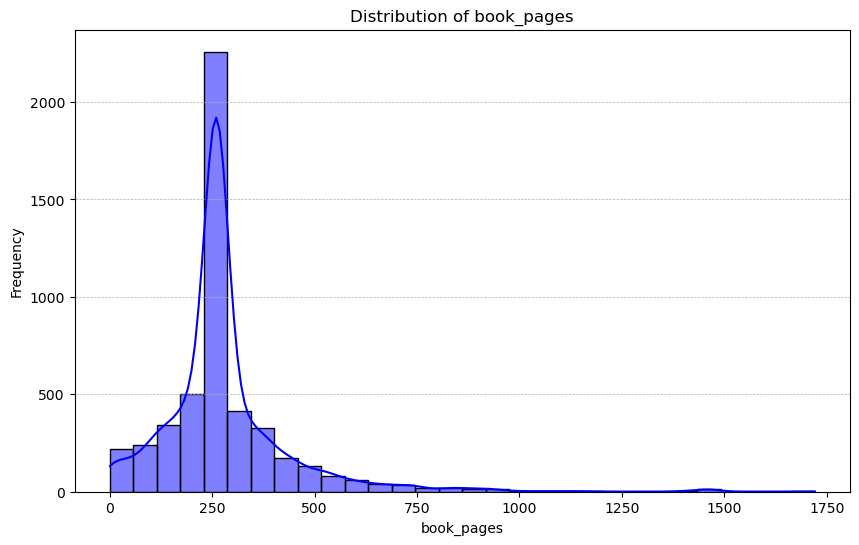

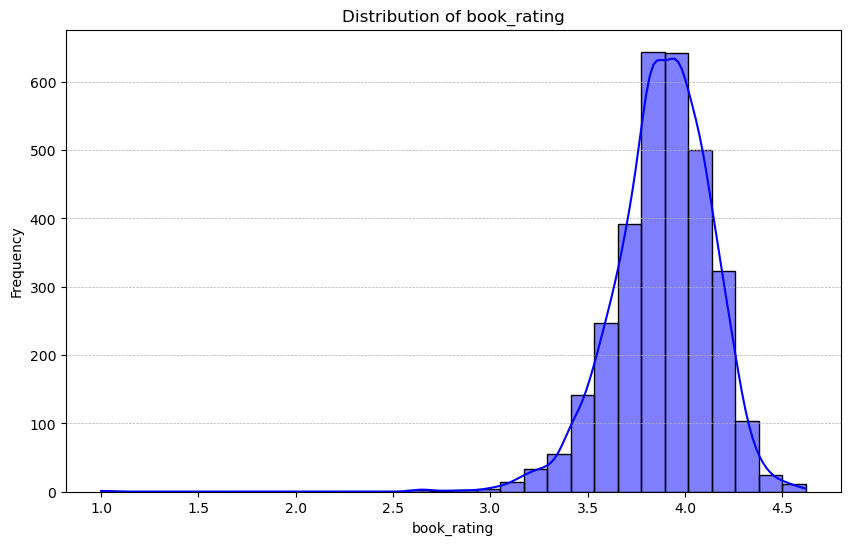

In [39]:
plot_histograms(movie_adaptation, ['book_pages', 'book_rating'])

We can see that most adaptations are of books of approximately 250 pages, and of ratings > 3.75.

### Book genres

/Users/ghaliabennani/Desktop/MA3/ADA/ada-2024-project-ada212/src/analysis.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index.str.replace('book_', '').str.replace('_', ' ').str.title(),


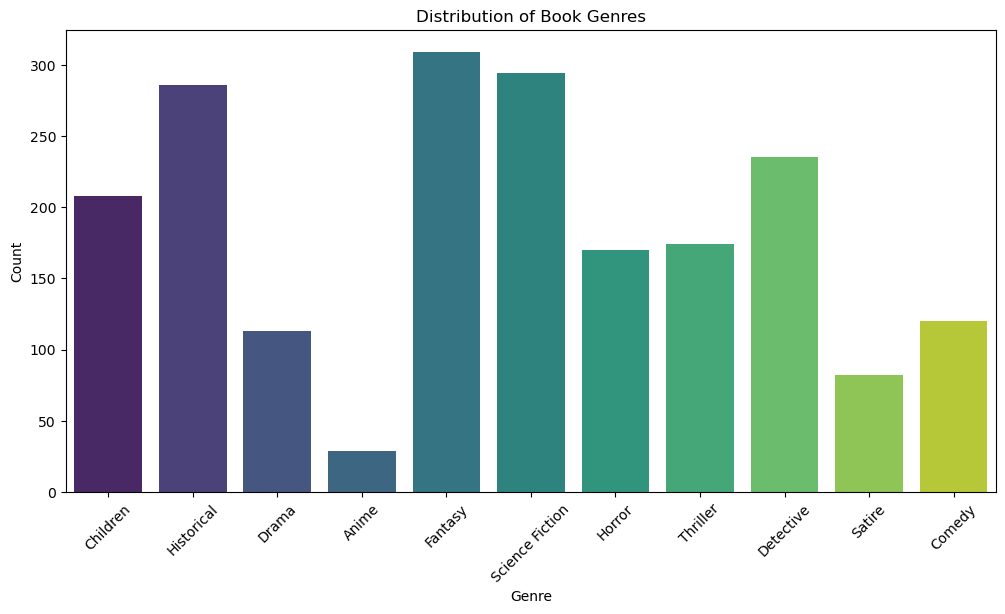

In [40]:
histogram_book_genre(movie_adaptation)

We can see that the genres that are attractive for adaptation are mostly historical, fantasy, science-fiction and detective.

### Fiction or not

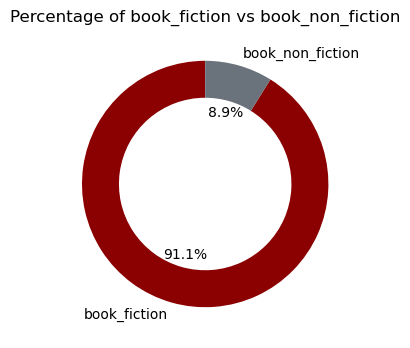

In [41]:
plot_pie_chart_2(movie_adaptation, 'book_fiction', 'book_non_fiction')

Most of the books that are adapted are fictions.

### Book part of a serie or not

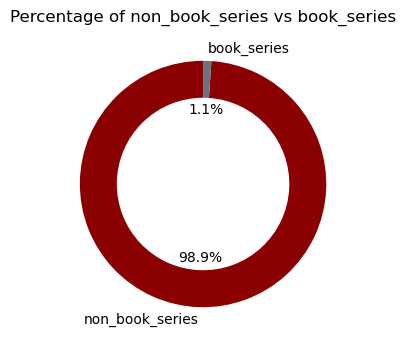

In [42]:
plot_pie_chart_1(movie_adaptation, 'book_series')

Most of the books that are adapted are not part of a serie.

Most of the books that are adapted are not part of a serie.


## Random Forest Regressor to highlight the importance of book features (e.g., page count, genre, ratings) in predicting the success of adaptations.

In [10]:

#since we need the revenues, we use the auxiliary dataset
auxiliary_dataset = pd.read_csv('data/auxiliary_dataset.csv')
movie_adaptation_aux = auxiliary_dataset[auxiliary_dataset['movie_is_adaptation']==True]
features = ['book_rating', 'book_pages', 'book_ratings_count', 'book_rating', 'time_gap']
target = ['movie_revenue']
X = auxiliary_dataset[features].dropna()
y = auxiliary_dataset[target].dropna()
X, y = X.align(y, join='inner', axis=0)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.DataFrame({'feature': features, 'importance': rf.feature_importances_})
print(importances.sort_values(by='importance', ascending=False))

# Evaluate
y_pred = rf.predict(X_test)
print("RMSE:", root_mean_squared_error(y_test, y_pred))

/Users/ghaliabennani/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              feature  importance
1          book_pages    0.420387
4            time_gap    0.200859
2  book_ratings_count    0.169073
3         book_rating    0.105749
0         book_rating    0.103932
RMSE: 6835919.891342586


## Research Question 2: How long does it take for a popular book to become a movie, and what influences this timeline?

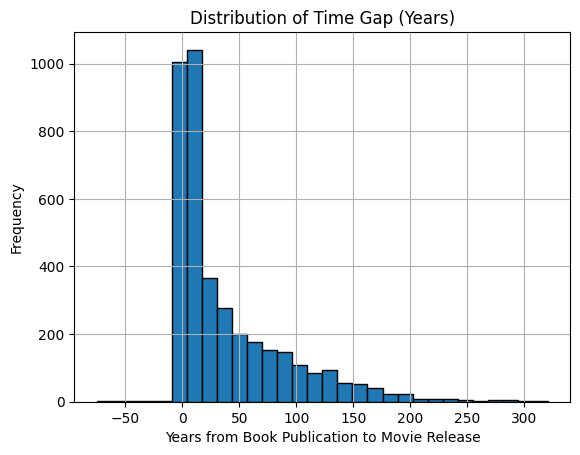

In [5]:
# Exploring the time_gap variable
movie_adaptation['time_gap'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Time Gap (Years)')
plt.xlabel('Years from Book Publication to Movie Release')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Handling NaN values of timegap column

movie_adaptation['time_gap'] = movie_adaptation['time_gap'].fillna(movie_adaptation['time_gap'].median())


/var/folders/t1/b1r79wh52p16t2dc8drzbqh80000gn/T/ipykernel_21041/775554623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_adaptation['time_gap'] = movie_adaptation['time_gap'].fillna(movie_adaptation['time_gap'].median())


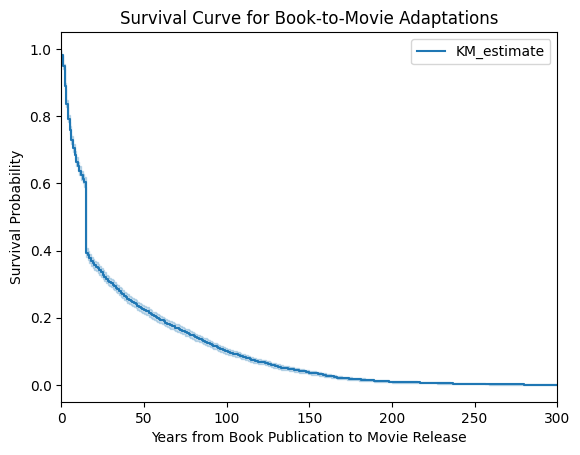

In [12]:
from lifelines import KaplanMeierFitter

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator
kmf.fit(movie_adaptation['time_gap'], event_observed=[1] * len(movie_adaptation))

# Plot the survival curve
kmf.plot_survival_function()
plt.title('Survival Curve for Book-to-Movie Adaptations')
plt.xlabel('Years from Book Publication to Movie Release')
plt.ylabel('Survival Probability')
plt.xlim([0,300])
plt.show()


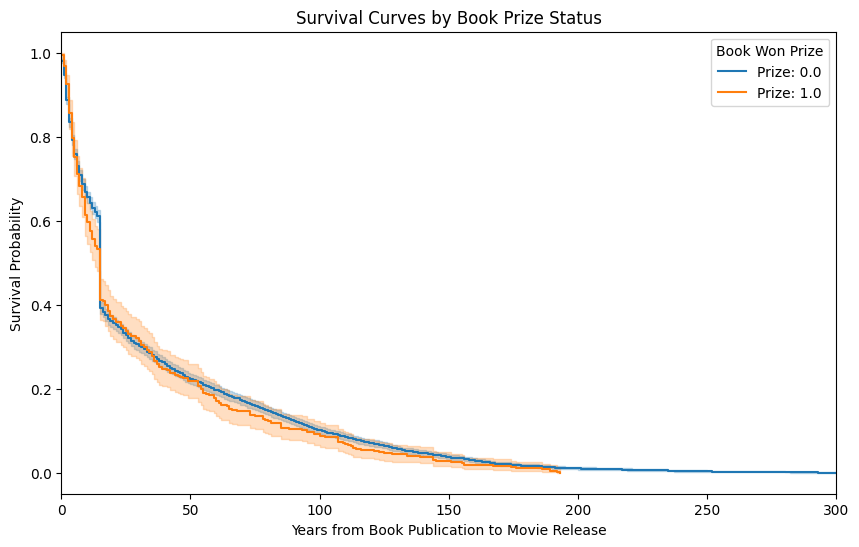

In [19]:
# Group by book_won_price
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
for group, subset in movie_adaptation.groupby('book_won_price'):
    kmf.fit(subset['time_gap'], event_observed=[1] * len(subset), label=f"Prize: {group}")
    kmf.plot_survival_function()

plt.title('Survival Curves by Book Prize Status')
plt.xlabel('Years from Book Publication to Movie Release')
plt.xlim([0,300])
plt.ylabel('Survival Probability')
plt.legend(title='Book Won Prize')
plt.show()


In [15]:
from lifelines.statistics import logrank_test

group1 = movie_adaptation[movie_adaptation['book_won_price'] == 1]['time_gap']
group2 = movie_adaptation[movie_adaptation['book_won_price'] == 0]['time_gap']

results = logrank_test(group1, group2)
print("Log-Rank Test p-value:", results.p_value)


Log-Rank Test p-value: 0.10130234565356405


## Research Question 4: What elements predict the success of a movie adaptation?

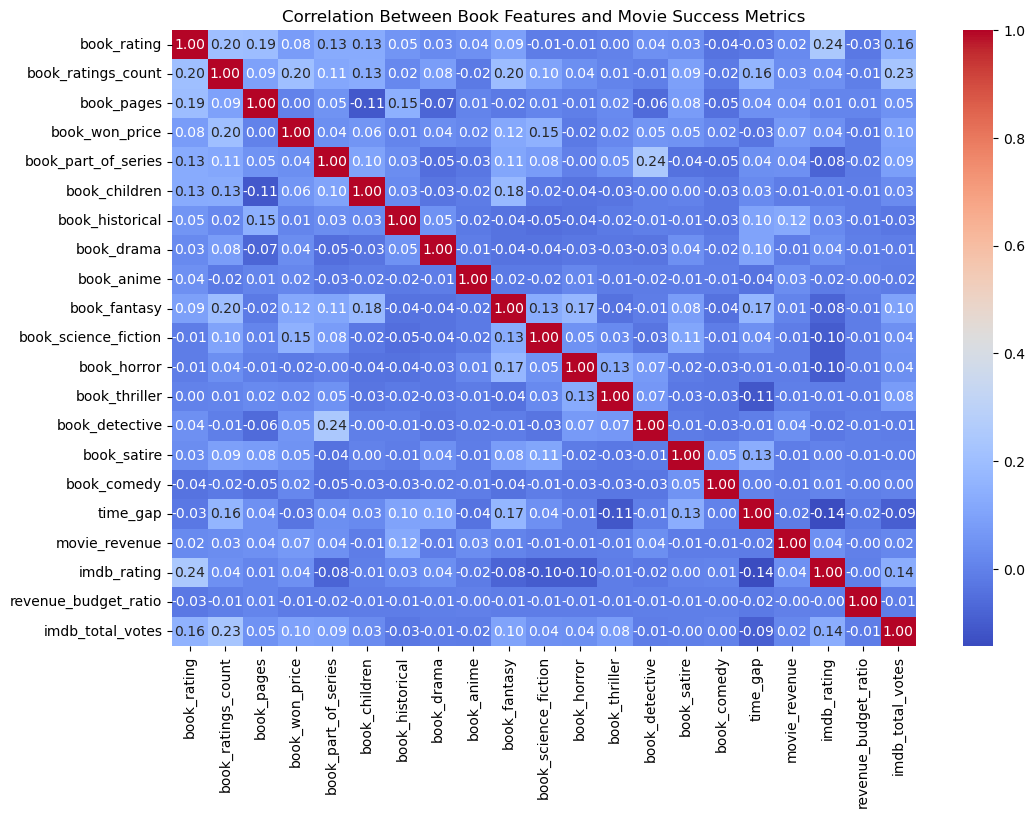

In [50]:
# Select relevant features
book_features = ['book_rating', 'book_ratings_count', 'book_pages', 'book_won_price',
                 'book_part_of_series', 'book_children', 'book_historical', 'book_drama',  'book_anime', 'book_fantasy', 'book_science_fiction', 'book_horror',
                 'book_thriller', 'book_detective', 'book_satire', 'book_comedy', 'time_gap']
movie_metrics = ['movie_revenue', 'imdb_rating', 'revenue_budget_ratio', 'imdb_total_votes']

# Correlation matrix
correlation_matrix = dataset[book_features + movie_metrics].corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Book Features and Movie Success Metrics')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = auxiliary_dataset[book_features]
y = auxiliary_dataset['movie_revenue']  # Or other success metric
data = pd.concat([X, y], axis=1)
data_clean = data.dropna()

X = data_clean[X.columns]
y = data_clean[y.name]
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R^2 Score: -0.05466802040538199
Mean Squared Error: 66403677514945.58


In [60]:
from scipy.stats import ttest_ind

# Separate groups
adapted = dataset[dataset['movie_is_adaptation'] == 1]
original = dataset[dataset['movie_is_adaptation'] == 0]

# Compare revenue
t_stat, p_value = ttest_ind(adapted['movie_revenue'], original['movie_revenue'], nan_policy='omit')
print("T-test for Revenue: t-stat =", t_stat, ", p-value =", p_value)

# Compare IMDb ratings
t_stat, p_value = ttest_ind(adapted['imdb_rating'], original['imdb_rating'], nan_policy='omit')
print("T-test for IMDb Ratings: t-stat =", t_stat, ", p-value =", p_value)

T-test for Revenue: t-stat = 1.1760848938737638 , p-value = 0.23958745097961898
T-test for IMDb Ratings: t-stat = 22.544315719208736 , p-value = 4.242175343120069e-112


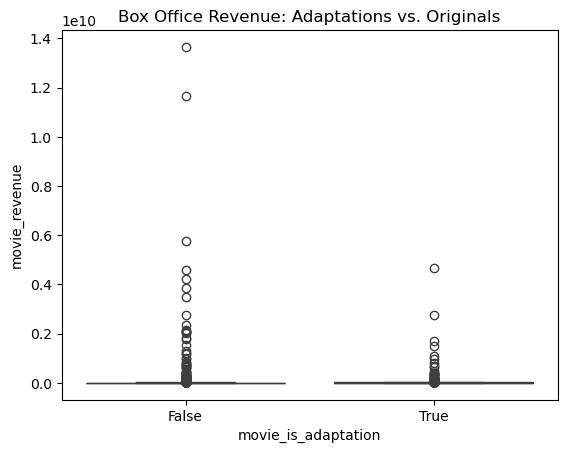

In [62]:
sns.boxplot(x='movie_is_adaptation', y='movie_revenue', data=dataset)
plt.title('Box Office Revenue: Adaptations vs. Originals')
plt.show()